## Custom cmap

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from prospect.utils.obsutils import fix_obs

from agnfinder.prospector import visualise, main, cpz_builders

In [3]:

blues_cmap = plt.get_cmap('Blues')


In [5]:
blues_cmap(.3)

(0.7161860822760477, 0.8332026143790849, 0.916155324875048, 1.0)

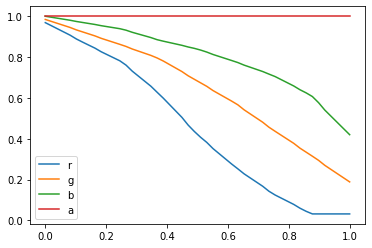

In [7]:
x = np.linspace(0, 1)
colors = blues_cmap(x)
for n, label in enumerate(['r', 'g', 'b', 'a']):
    plt.plot(x, colors[:, n], label=label)
plt.legend()

In [10]:
from matplotlib.colors import ListedColormap

In [38]:
viridis.colors[:, :3].shape

(256, 3)

In [40]:
viridis(.3)

(0.206756, 0.371758, 0.553117, 1.0)

(256, 3) (256, 1)


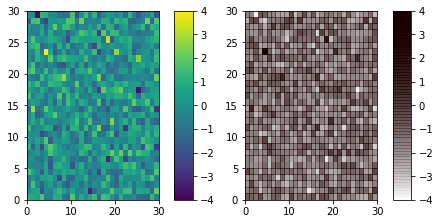

In [39]:
viridis = cm.get_cmap('viridis', 256)


def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([viridis, newcmp])

In [55]:
def get_cmap(hue_val):
    base_color = viridis(hue_val)[:3]
    base_colors = np.array([base_color for _ in np.linspace(0, 1, 256)])
    x = np.linspace(0, 1, 256).reshape(-1, 1)
#     print(base_colors.shape, x.shape)
    newcolors = np.concatenate((base_colors, x), axis=1)
    return ListedColormap(newcolors)

In [57]:
get_cmap(.3)

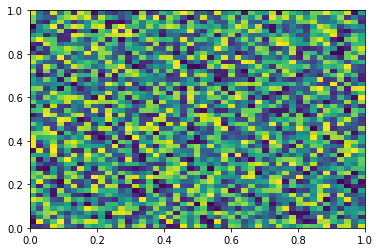

In [48]:
posteriors = np.random.rand(50, 50)
plt.pcolormesh(np.linspace(0, 1), np.linspace(0, 1), posteriors)

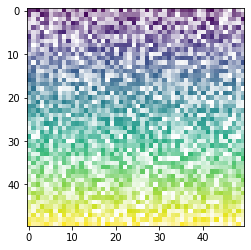

In [58]:
posteriors = np.random.rand(50, 50)
posterior_colors = np.zeros((50, 50, 4))
for n, x in enumerate(np.linspace(0, 1)):
    custom_cmap = get_cmap(x)
    posterior_colors[n] = custom_cmap(posteriors[n])
plt.imshow(posterior_colors)

In [59]:
posterior_colors.shape

(50, 50, 4)

In [61]:
np.transpose(posterior_colors, axes=[1, 0 , 2]).shape

(50, 50, 4)